# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module04\dsc-mod-4-project-online-ds-pt-051319

31/10/2019  11:27    <DIR>          .
31/10/2019  11:27    <DIR>          ..
25/10/2019  14:34                29 .gitignore
25/10/2019  14:36    <DIR>          .ipynb_checkpoints
25/10/2019  14:34                93 .learn
25/10/2019  14:34             1,849 CONTRIBUTING.md
25/10/2019  14:34    <DIR>          images
25/10/2019  14:34             1,371 LICENSE.md
31/10/2019  11:27           141,203 mod_4_starter_notebook.ipynb
25/10/2019  14:34            78,048 module4_project_rubric.pdf
25/10/2019  14:34             8,295 README.md
25/10/2019  14:34    <DIR>          starter_notebook
25/10/2019  14:34        26,312,281 zillow_data.csv
               8 File(s)     26,543,169 bytes
               5 Dir(s)  58,537,631,744 bytes free


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)

In [7]:
df[df['City'] == 'Kansas City'].shape

(37, 270)

In [8]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})


# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg

In [9]:
df_melted = melt_data(df)
df_melted.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


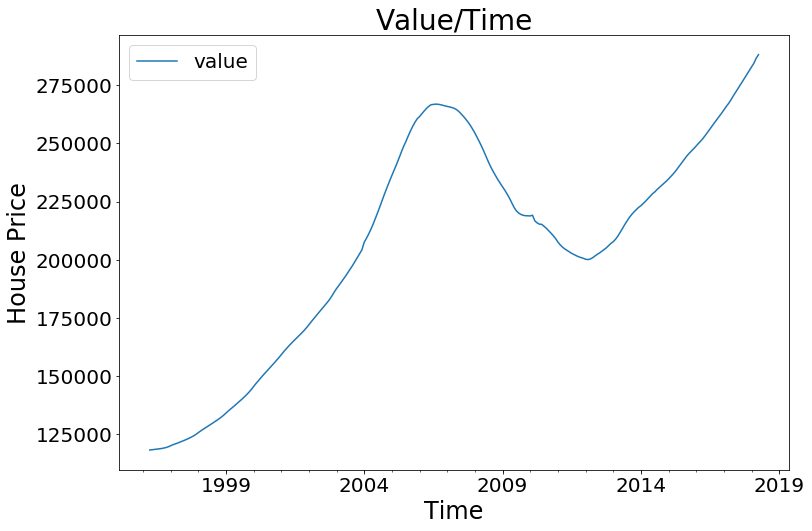

In [103]:
df_melted.plot(kind='line', figsize=(12,8))
plt.title('Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [11]:
series = melt_data(df.loc[[2919]])
model= ARIMA(series, order=(1,1,1))
model_fit= model.fit()

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [12]:
today = series.iloc[-1].value
six_months = model_fit.forecast(steps=36)[0][-1]
(six_months - today)/today

0.05679732209422842

In [13]:
df

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,77084,Houston,TX,Houston,Harris,95000.0,95200.0,95400.0,95700.0,95900.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,10467,New York,NY,New York,Bronx,152900.0,152700.0,152600.0,152400.0,152300.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,60640,Chicago,IL,Chicago,Cook,216500.0,216700.0,216900.0,217000.0,217100.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,77449,Katy,TX,Houston,Harris,95400.0,95600.0,95800.0,96100.0,96400.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,94109,San Francisco,CA,San Francisco,San Francisco,766000.0,771100.0,776500.0,781900.0,787300.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [14]:
today = series.iloc[-1].value

In [15]:
roi_list = {}
for index, x in df[df['City'] == 'Kansas City'].iterrows():
    print(x['RegionName'])
    series = melt_data(df.loc[[index]])
    # evaluate parameters
    p_values = [0, 1, 2]
    d_values = range(0, 2)
    q_values = range(0, 2)
    warnings.filterwarnings("ignore")
    
    order = evaluate_models(series.values, p_values, d_values, q_values)
    
    model= ARIMA(series, order=order)
    model_fit= model.fit()
    six_months = model_fit.forecast(steps=36)[0][-1]
    today = series.iloc[-1].value
    roi = (six_months - today)/today
    roi_list[x['RegionName']] = roi

64119
ARIMA(0, 0, 0) MSE=93611590.076
ARIMA(0, 0, 1) MSE=24344135.774
ARIMA(0, 1, 0) MSE=875810.127
ARIMA(0, 1, 1) MSE=351653.230
ARIMA(1, 0, 0) MSE=921897.011
ARIMA(1, 1, 0) MSE=337473.443
ARIMA(1, 1, 1) MSE=256744.799
ARIMA(2, 0, 0) MSE=338327.407
ARIMA(2, 0, 1) MSE=259557.192
ARIMA(2, 1, 0) MSE=291309.276
ARIMA(2, 1, 1) MSE=259864.982
Best ARIMA(1, 1, 1) MSE=256744.799
64114
ARIMA(0, 0, 0) MSE=559210333.009
ARIMA(0, 0, 1) MSE=144359078.033
ARIMA(0, 1, 0) MSE=881044.928
ARIMA(0, 1, 1) MSE=322385.536
ARIMA(1, 0, 0) MSE=1130423.428
ARIMA(1, 1, 0) MSE=182842.663
ARIMA(1, 1, 1) MSE=157165.738
ARIMA(2, 0, 0) MSE=185511.413
ARIMA(2, 1, 0) MSE=170707.770
ARIMA(2, 1, 1) MSE=159283.549
Best ARIMA(1, 1, 1) MSE=157165.738
64151
ARIMA(0, 0, 0) MSE=348965340.874
ARIMA(0, 0, 1) MSE=90068757.065
ARIMA(0, 1, 0) MSE=1476214.284
ARIMA(0, 1, 1) MSE=555361.512
ARIMA(1, 0, 0) MSE=1611215.523
ARIMA(1, 1, 0) MSE=589199.533
ARIMA(1, 1, 1) MSE=372531.470
ARIMA(2, 0, 0) MSE=593654.932
ARIMA(2, 0, 1) MSE=37947

ARIMA(1, 1, 1) MSE=225963.580
ARIMA(2, 0, 0) MSE=315311.063
ARIMA(2, 0, 1) MSE=227134.652
ARIMA(2, 1, 0) MSE=281724.451
ARIMA(2, 1, 1) MSE=231416.459
Best ARIMA(1, 1, 1) MSE=225963.580
64105
ARIMA(0, 0, 0) MSE=233439718.259
ARIMA(0, 0, 1) MSE=59342038.307
ARIMA(0, 1, 0) MSE=1685229.670
ARIMA(0, 1, 1) MSE=734414.826
ARIMA(1, 0, 0) MSE=1585561.399
ARIMA(1, 1, 0) MSE=1016577.926
ARIMA(1, 1, 1) MSE=682609.006
ARIMA(2, 0, 0) MSE=1018268.790
ARIMA(2, 0, 1) MSE=686752.896
ARIMA(2, 1, 0) MSE=856858.046
ARIMA(2, 1, 1) MSE=676616.762
Best ARIMA(2, 1, 1) MSE=676616.762
64129
ARIMA(0, 0, 0) MSE=116257594.074
ARIMA(0, 0, 1) MSE=28874146.911
ARIMA(0, 1, 0) MSE=727670.750
ARIMA(0, 1, 1) MSE=294036.101
ARIMA(1, 0, 0) MSE=705104.698
ARIMA(1, 1, 0) MSE=357629.389
ARIMA(1, 1, 1) MSE=251863.181
ARIMA(2, 0, 1) MSE=250819.286
ARIMA(2, 1, 0) MSE=323110.471
ARIMA(2, 1, 1) MSE=256519.700
Best ARIMA(2, 0, 1) MSE=250819.286
64123
ARIMA(0, 0, 0) MSE=23137869.162
ARIMA(0, 0, 1) MSE=5809465.250
ARIMA(0, 1, 0) MSE=6

In [16]:
roi_list

{64119: 0.05679732209422842,
 64114: 0.1192970729762698,
 64151: 0.05905026321941397,
 64111: 0.09693136094924668,
 66102: 0.01407573960837967,
 64131: 0.04546284263701976,
 66104: 0.0017268933293670607,
 64155: 0.06257263719843865,
 66109: 0.07817196811403077,
 64134: 0.04056394230247112,
 64116: 0.07975137309361202,
 66106: 0.1373985358861824,
 64157: 0.06528310078178046,
 64110: 0.08353030324922359,
 64117: 0.06822308914977174,
 66103: 0.10155508045775981,
 64112: 0.10592691843828653,
 66112: 0.08488559860951322,
 64154: 0.04150743227539524,
 64108: 0.03203111596063606,
 64113: 0.08080219700287117,
 64106: 0.14737096179258374,
 64124: 0.0067724159021344005,
 64137: 0.06481306716880608,
 64105: 0.06870997231295099,
 64129: -0.01684479110929328,
 64123: 0.05745865294676608,
 66111: 0.06020684041017004,
 64126: 0.06094194217722193,
 64156: 0.06920193050296697,
 64153: 0.05623209319876416,
 64158: 0.06907822253949673,
 64145: 0.09720449413548049,
 64136: 0.04962982541605204,
 64125: 0.0

In [17]:
s = [(k, roi_list[k]) for k in sorted(roi_list, key=roi_list.get, reverse=True)]
for k, v in s:
    print(k, v)

64106 0.14737096179258374
66106 0.1373985358861824
64114 0.1192970729762698
64112 0.10592691843828653
66103 0.10155508045775981
64145 0.09720449413548049
64111 0.09693136094924668
64139 0.09670521678169679
66112 0.08488559860951322
64110 0.08353030324922359
64113 0.08080219700287117
64116 0.07975137309361202
66109 0.07817196811403077
64156 0.06920193050296697
64158 0.06907822253949673
64105 0.06870997231295099
64117 0.06822308914977174
64157 0.06528310078178046
64137 0.06481306716880608
64155 0.06257263719843865
64126 0.06094194217722193
66111 0.06020684041017004
64151 0.05905026321941397
64123 0.05745865294676608
64119 0.05679732209422842
64125 0.05666884598152787
64153 0.05623209319876416
64136 0.04962982541605204
64131 0.04546284263701976
64146 0.044572768695209576
64154 0.04150743227539524
64134 0.04056394230247112
64108 0.03203111596063606
66102 0.01407573960837967
64124 0.0067724159021344005
66104 0.0017268933293670607
64129 -0.01684479110929328


In [18]:
top_5 = s[:5]
top_5

[(64106, 0.14737096179258374),
 (66106, 0.1373985358861824),
 (64114, 0.1192970729762698),
 (64112, 0.10592691843828653),
 (66103, 0.10155508045775981)]

In [113]:
df_top_5 = pd.DataFrame(top_5)
df_top_5
df_top_5.columns = ['ZipCode', 'ROI']
df_top_5

,ZipCode,ROI
0,64106,0.147371
1,66106,0.137399
2,64114,0.119297
3,64112,0.105927
4,66103,0.101555


In [120]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [121]:
df_top_5['Value In 3 Years 1000000 Invested'] = (df_top_5['ROI']+1)*1000000
df_top_5

,ZipCode,ROI,Value In 3 Years 1000000 Invested
0,64106,0.15,1147370.96
1,66106,0.14,1137398.54
2,64114,0.12,1119297.07
3,64112,0.11,1105926.92
4,66103,0.10,1101555.08


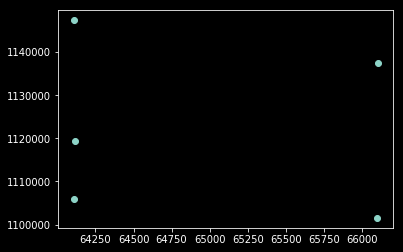

In [131]:
with plt.style.context('dark_background'):
    plt.scatter(df_top_5['ZipCode'], df_top_5['Value In 3 Years 1000000 Invested'])

In [19]:
#Get Location Names
best5_zipcodes = top_5
best_5 = {}
for i in top_5:
    city = df[df['RegionName']==i[0]].City.values[0]
    state = df[df['RegionName']==i[0]].State.values[0]
    print(f'Zipcode : {i[0]} \nLocation: {city}, {state}\nROI : {i[1]}\n')

Zipcode : 64106 
Location: Kansas City, MO
ROI : 0.14737096179258374

Zipcode : 66106 
Location: Kansas City, KS
ROI : 0.1373985358861824

Zipcode : 64114 
Location: Kansas City, MO
ROI : 0.1192970729762698

Zipcode : 64112 
Location: Kansas City, MO
ROI : 0.10592691843828653

Zipcode : 66103 
Location: Kansas City, KS
ROI : 0.10155508045775981



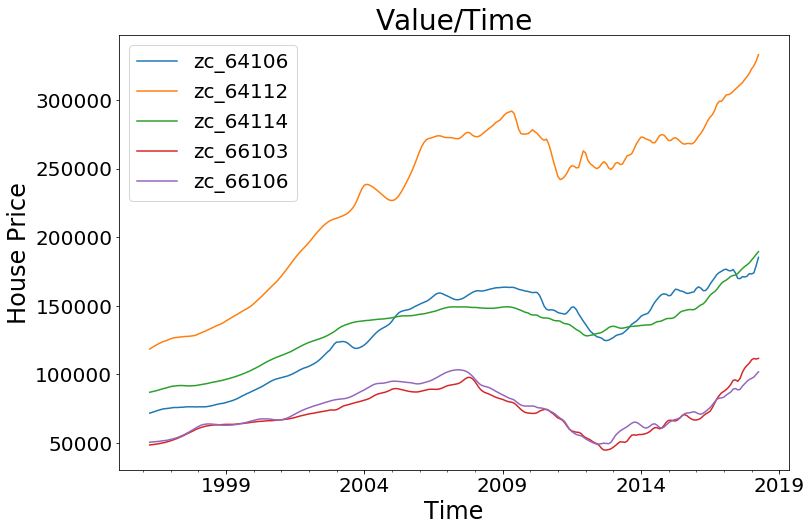

In [104]:
zips = pd.concat([zc_64106,zc_64112,zc_64114,zc_66103,zc_66106], axis=1)
zips.columns=['zc_64106','zc_64112','zc_64114','zc_66103','zc_66106']
zips.plot(figsize=(12,8))
plt.title('Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [101]:
kansas_city_map = folium.Map(location=[39.0997, -94.5786], tiles='Stamen Toner')

folium.CircleMarker(location=[39.1040, -94.5702],radius=15,popup='zc_64106',color='#3186cc',fill=True,fill_color='#3186cc'
).add_to(kansas_city_map)

folium.CircleMarker(location=[39.0704, -94.6967],radius=15,popup='zc_66103',color='red',fill=True,fill_color='red'
).add_to(kansas_city_map)

folium.CircleMarker(location=[38.9547, -94.5986],radius=15,popup='zc_64114',color='green',fill=True,fill_color='green'
).add_to(kansas_city_map)

folium.CircleMarker(location=[39.0379, -94.5986],radius=15,popup='zc_64112',color='orange',fill=True,fill_color='orange'
).add_to(kansas_city_map)

folium.CircleMarker(location=[39.0575, -94.6295],radius=15,popup='zc_64106',color='purple',fill=True,fill_color='purple'
).add_to(kansas_city_map)

marker.add_to(kansas_city_map);
kansas_city_map

In [110]:
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/kansas-city.geojson'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=url,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m

# Zipcode : 64106 
# Location: Kansas City, MO

In [20]:
zc_64106 = df[df['RegionName'] == 64106]
zc_64106 = melt_data(zc_64106)
zc_64106.head()

,value
time,
1996-04-01,71800.0
1996-05-01,72300.0
1996-06-01,72900.0
1996-07-01,73500.0
1996-08-01,74000.0


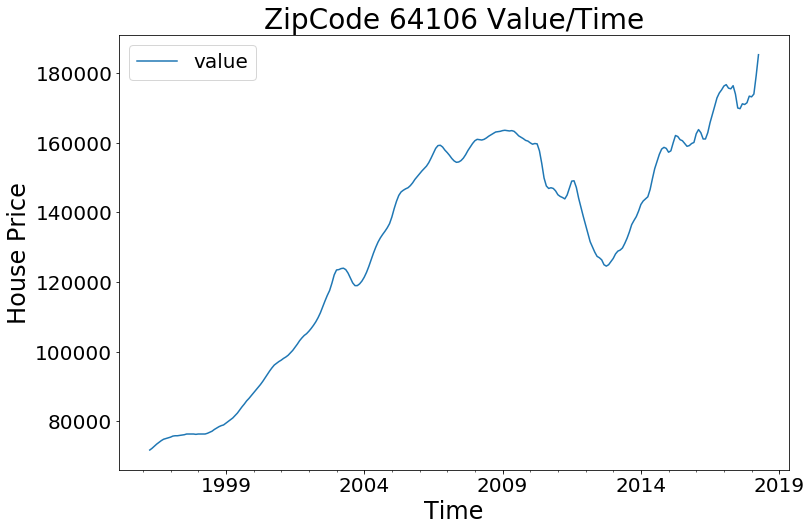

In [21]:
zc_64106.plot(figsize=(12,8))
plt.title('ZipCode 64106 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [22]:
model = ARIMA(zc_64106, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2079.527
Method:                       css-mle   S.D. of innovations            635.630
Date:                Thu, 31 Oct 2019   AIC                           4167.054
Time:                        12:12:27   BIC                           4181.358
Sample:                    05-01-1996   HQIC                          4172.801
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           469.4010    179.878      2.610      0.010     116.846     821.956
ar.L1.D.value     0.6409      0.052     12.245      0.000       0.538       0.744
ma.L1.D.value     0.6632      0.043     

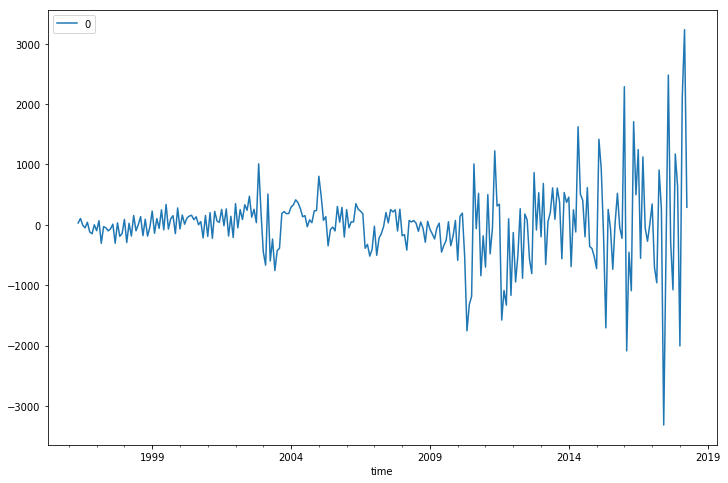

In [23]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12,8))
plt.show()

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module04\dsc-mod-4-project-online-ds-pt-051319

31/10/2019  13:43    <DIR>          .
31/10/2019  13:43    <DIR>          ..
25/10/2019  14:34                29 .gitignore
25/10/2019  14:36    <DIR>          .ipynb_checkpoints
25/10/2019  14:34                93 .learn
31/10/2019  13:43    <DIR>          click_that_hood
25/10/2019  14:34             1,849 CONTRIBUTING.md
25/10/2019  14:34    <DIR>          images
25/10/2019  14:34             1,371 LICENSE.md
31/10/2019  13:41         1,194,831 mod_4_starter_notebook.ipynb
25/10/2019  14:34            78,048 module4_project_rubric.pdf
25/10/2019  14:34             8,295 README.md
25/10/2019  14:34    <DIR>          starter_notebook
25/10/2019  14:34        26,312,281 zillow_data.csv
               8 File(s)     27,596,797 bytes
               6 Dir(s)  58,255,663,104 bytes free


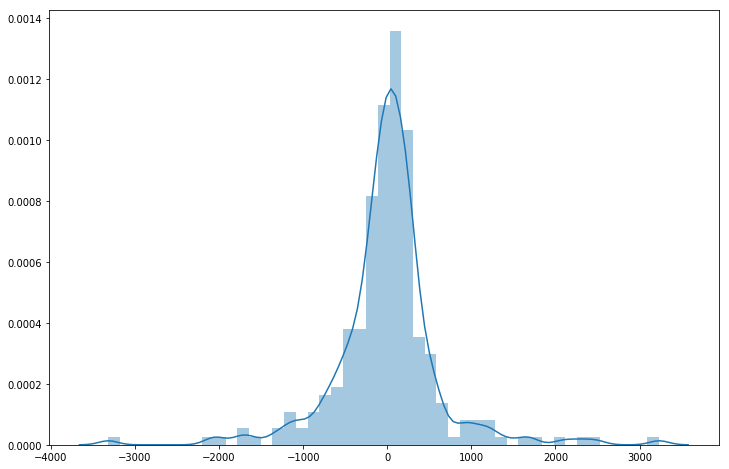

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(residuals)

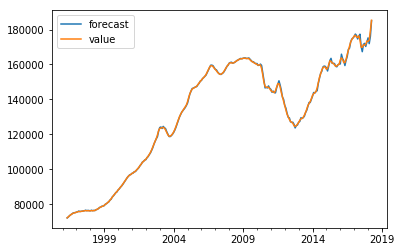

In [25]:
model_fit.plot_predict()
plt.show()

In [26]:
model_fit.forecast(36)[0]

array([189506.93847454, 192371.89933686, 194376.72496013, 195830.25030631,
       196930.42192191, 197804.11286245, 198532.64191072, 199168.13001869,
       199743.98390421, 200281.6154709 , 200794.7485936 , 201292.1795356 ,
       201779.54622702, 202260.46227688, 202737.24381355, 203211.37535036,
       203683.80838025, 204155.15275884, 204625.79937071, 205095.99875174,
       205565.91148195, 206035.64048444, 206505.25172738, 206974.78749281,
       207444.27488122, 207913.73126257, 208383.16777007, 208852.5915395 ,
       209322.00714452, 209791.41751659, 210260.82453463, 210730.22940291,
       211199.63289331, 211669.03550056, 212138.43754177, 212607.83922017])

# Zipcode : 66106 
# Location: Kansas City, KS

In [27]:
zc_66106 = df[df['RegionName'] == 66106]
zc_66106 = melt_data(zc_66106)
zc_66106.head()

,value
time,
1996-04-01,50600.0
1996-05-01,50800.0
1996-06-01,50900.0
1996-07-01,51100.0
1996-08-01,51200.0


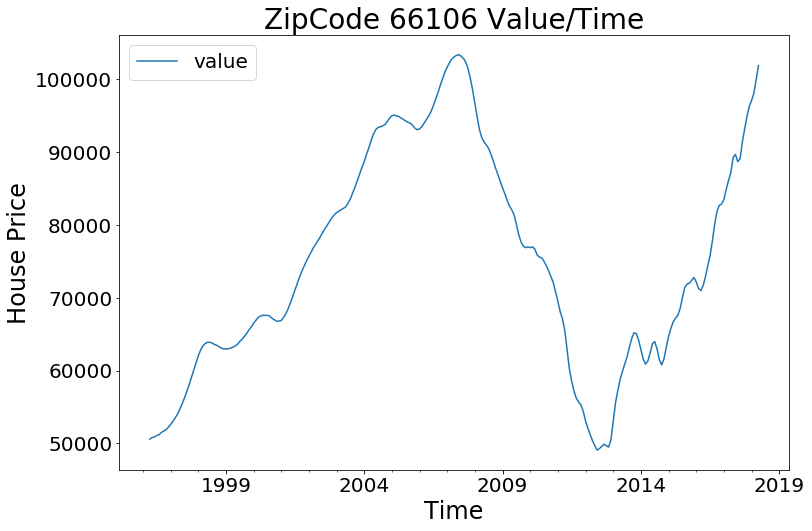

In [28]:
zc_66106.plot(figsize=(12,8))
plt.title('ZipCode 66106 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [29]:
model = ARIMA(zc_66106, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1919.076
Method:                       css-mle   S.D. of innovations            345.845
Date:                Thu, 31 Oct 2019   AIC                           3846.152
Time:                        12:12:27   BIC                           3860.456
Sample:                    05-01-1996   HQIC                          3851.900
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           219.5043    166.302      1.320      0.188    -106.441     545.449
ar.L1.D.value     0.7970      0.038     20.703      0.000       0.722       0.872
ma.L1.D.value     0.6112      0.042     

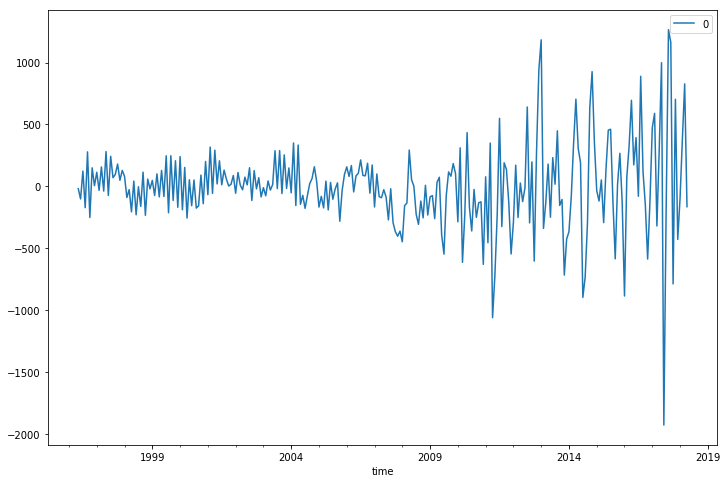

In [30]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12,8))
plt.show()

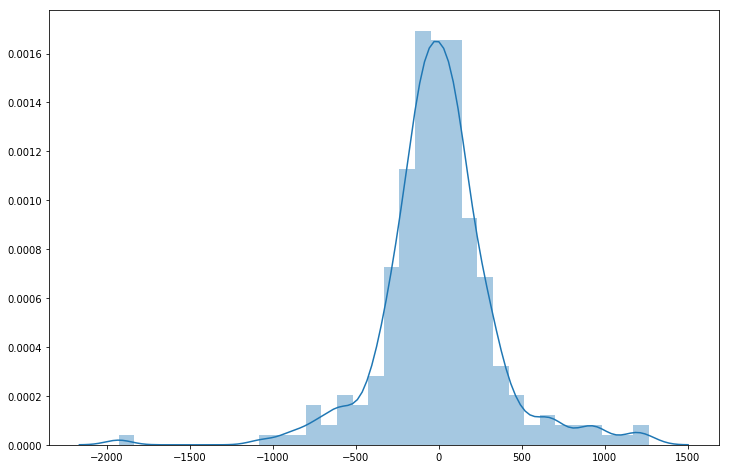

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(residuals)

<Figure size 864x576 with 0 Axes>

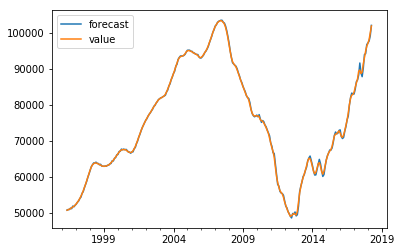

In [32]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

In [33]:
model_fit.forecast(36)[0]

array([103358.17446377, 104564.84354963, 105571.07408599, 106417.56405352,
       107136.74792456, 107754.47452443, 108291.34421207, 108763.77455316,
       109184.84961406, 109564.99681107, 109912.52632914, 110234.06101438,
       110534.87897924, 110819.18664352, 111090.3363359 , 111350.99971254,
       111603.30596403, 111848.95196016, 112089.29003034, 112325.39792067,
       112558.13454667, 112788.1844256 , 113016.09308717, 113242.29529416,
       113467.13753309, 113690.89593825, 113913.7905763 , 114135.99683056,
       114357.6544737 , 114578.87489829, 114799.74687922, 115020.34116612,
       115240.7141433 , 115460.9107465 , 115680.96678754, 115900.9108068 ])

# Zipcode : 64114 
# Location: Kansas City, MO

In [34]:
zc_64114 = df[df['RegionName'] == 64114]
zc_64114 = melt_data(zc_64114)
zc_64114.head()

,value
time,
1996-04-01,87000.0
1996-05-01,87400.0
1996-06-01,87800.0
1996-07-01,88200.0
1996-08-01,88700.0


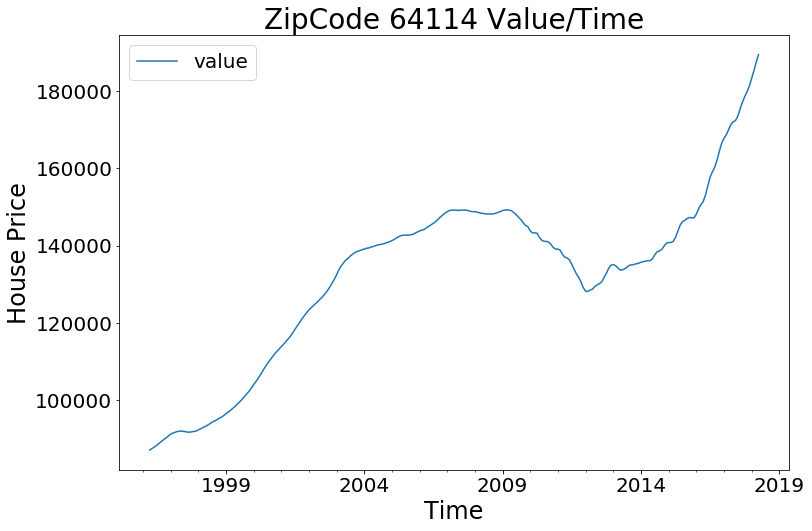

In [35]:
zc_64114.plot(figsize=(12,8))
plt.title('ZipCode 64114 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [36]:
model = ARIMA(zc_64114, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1844.584
Method:                       css-mle   S.D. of innovations            260.939
Date:                Thu, 31 Oct 2019   AIC                           3697.168
Time:                        12:12:28   BIC                           3711.472
Sample:                    05-01-1996   HQIC                          3702.915
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           416.5372    135.790      3.068      0.002     150.394     682.680
ar.L1.D.value     0.8325      0.037     22.730      0.000       0.761       0.904
ma.L1.D.value     0.4421      0.053     

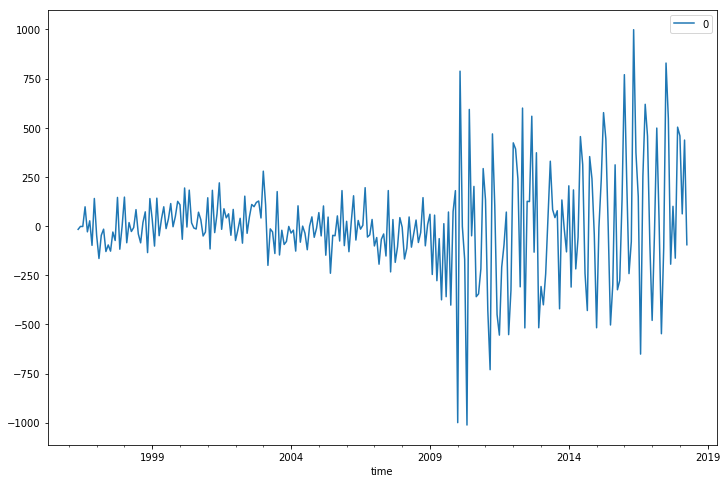

In [37]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12,8))
plt.show()

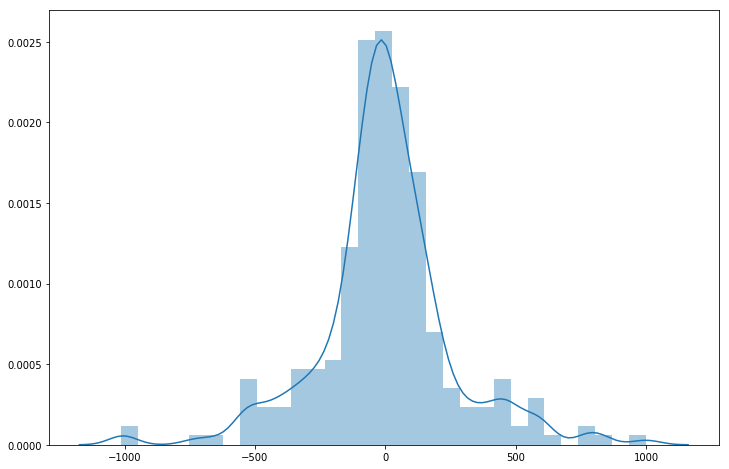

In [38]:
plt.figure(figsize=(12,8))
sns.distplot(residuals)

<Figure size 864x576 with 0 Axes>

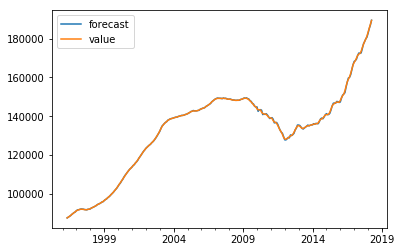

In [39]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

In [40]:
model_fit.forecast(36)[0]

array([191192.90444041, 192672.06624522, 193973.27912155, 195126.34270112,
       196156.06631841, 197083.10469432, 197924.65367491, 198695.02946043,
       199406.1508358 , 200067.94064582, 200688.66003874, 201275.18673683,
       201833.24670719, 202367.60703672, 202882.23650778, 203380.43928366,
       203864.9662068 , 204338.10745888, 204801.76970385, 205257.54031243,
       205706.74083155, 206150.47149961, 206589.64830722, 207025.03385164,
       207457.26302429, 207886.86439657, 208314.27802442, 208739.87027128,
       209163.9461487 , 209586.75959052, 210008.52200635, 210429.4094028 ,
       210849.56831211, 211269.12072799, 211688.16821486, 212106.795329  ])

# Zipcode : 64112 
# Location: Kansas City, MO

In [41]:
zc_64112 = df[df['RegionName'] == 64112]
zc_64112 = melt_data(zc_64112)
zc_64112.head()

,value
time,
1996-04-01,118500.0
1996-05-01,119600.0
1996-06-01,120600.0
1996-07-01,121600.0
1996-08-01,122500.0


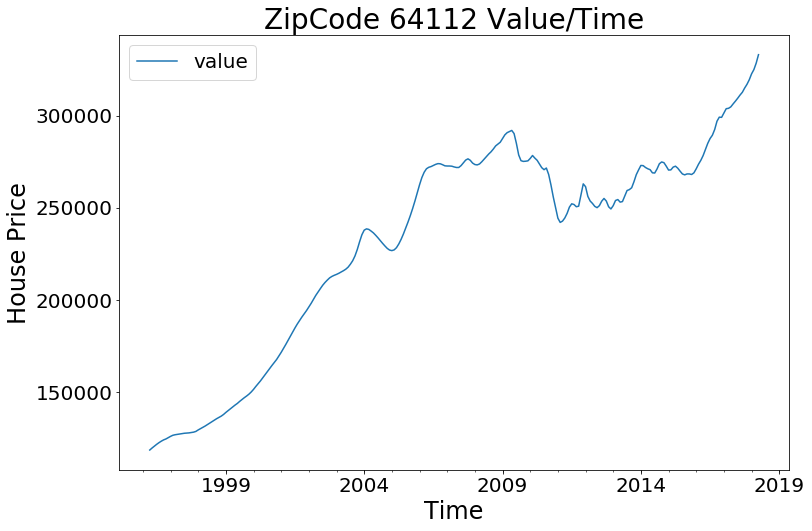

In [42]:
zc_64112.plot(figsize=(12,8))
plt.title('ZipCode 64112 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [43]:
model = ARIMA(zc_64114, order = (2,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1844.524
Method:                       css-mle   S.D. of innovations            260.882
Date:                Thu, 31 Oct 2019   AIC                           3699.049
Time:                        12:12:29   BIC                           3716.928
Sample:                    05-01-1996   HQIC                          3706.233
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           418.7750    138.720      3.019      0.003     146.890     690.660
ar.L1.D.value     0.7991      0.105      7.644      0.000       0.594       1.004
ar.L2.D.value     0.0345      0.101     

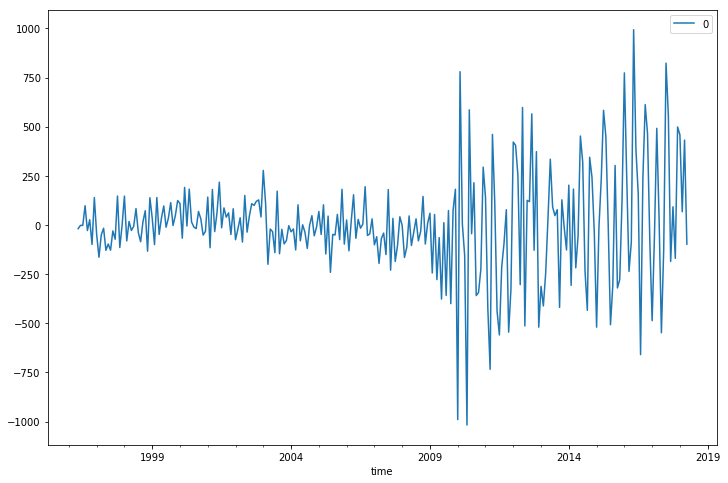

In [44]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12,8))
plt.show()

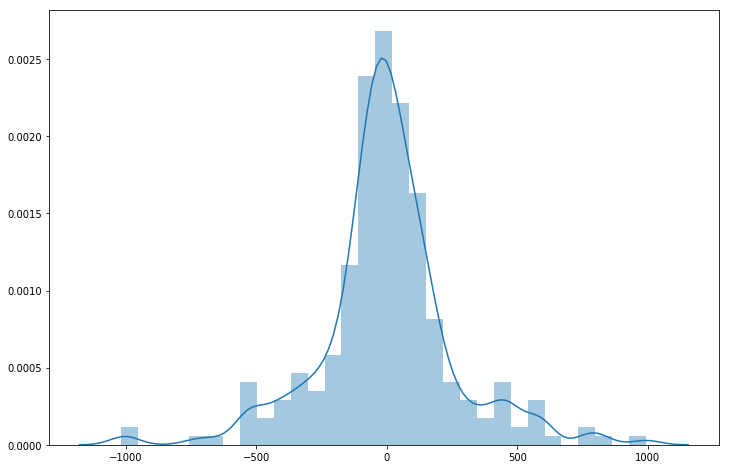

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(residuals)

<Figure size 864x576 with 0 Axes>

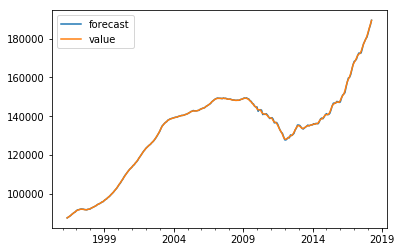

In [46]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

In [47]:
model_fit.forecast(36)[0]

array([191198.5118896 , 192694.44726489, 194018.10882513, 195197.12113276,
       196254.60390814, 197209.98466361, 198079.58513453, 198877.1179158 ,
       199614.10354525, 200300.22092   , 200943.60169596, 201551.07762541,
       202128.38835597, 202680.35601135, 203211.03186417, 203723.81956199,
       204221.57865489, 204706.71157331, 205181.23670194, 205646.84977216,
       206104.97544053, 206556.81062202, 207003.36089614, 207445.47109328,
       207883.85099166, 208319.09690632, 208751.70982707, 209182.1106569 ,
       209610.65301443, 210037.63398981, 210463.30318119, 210887.87028667,
       211311.51148259, 211734.37478224, 212156.58453794, 212578.24522338])

# Zipcode : 66103 
# Location: Kansas City, KS

In [48]:
zc_66103 = df[df['RegionName'] == 66103]
zc_66103 = melt_data(zc_66103)
zc_66103.head()

,value
time,
1996-04-01,48600.0
1996-05-01,48800.0
1996-06-01,49000.0
1996-07-01,49300.0
1996-08-01,49500.0


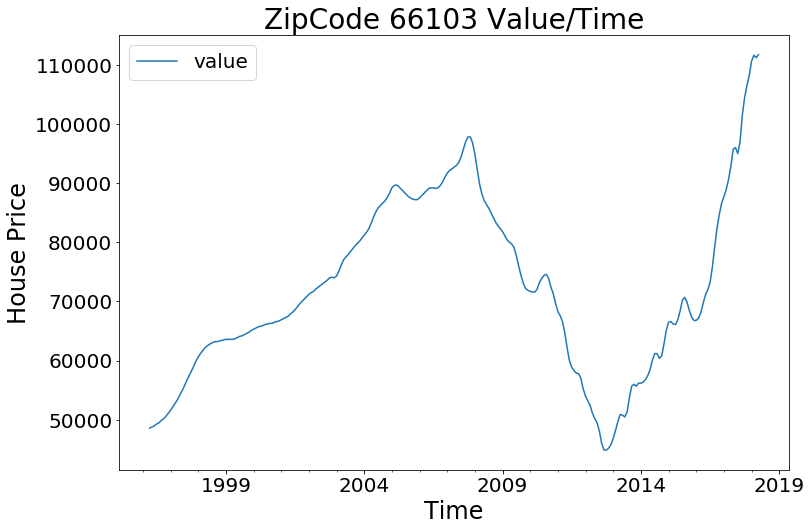

In [49]:
zc_66103.plot(figsize=(12,8))
plt.title('ZipCode 66103 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [50]:
model = ARIMA(zc_66103, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1992.198
Method:                       css-mle   S.D. of innovations            456.459
Date:                Thu, 31 Oct 2019   AIC                           3992.396
Time:                        12:12:30   BIC                           4006.700
Sample:                    05-01-1996   HQIC                          3998.144
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           248.7080    155.259      1.602      0.110     -55.593     553.009
ar.L1.D.value     0.7045      0.045     15.504      0.000       0.615       0.794
ma.L1.D.value     0.6498      0.040     

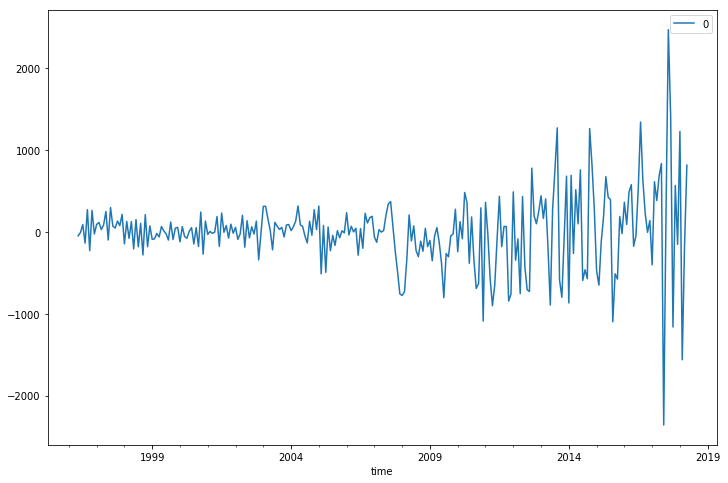

In [51]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12,8))
plt.show()

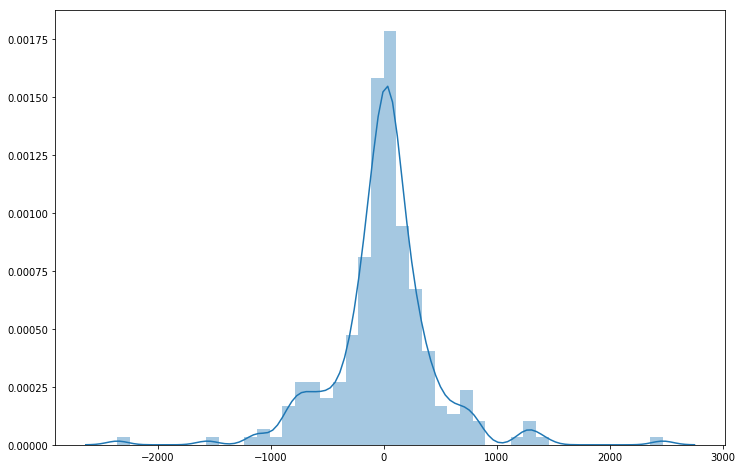

In [52]:
plt.figure(figsize=(12,8))
sns.distplot(residuals)

<Figure size 864x576 with 0 Axes>

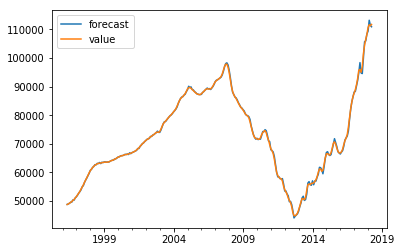

In [53]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

In [54]:
model_fit.forecast(36)[0]

array([112654.90439252, 113401.16151851, 114000.41666918, 114496.10189965,
       114918.81716935, 115290.12161278, 115625.20467101, 115934.76803151,
       116226.35154479, 116505.26739603, 116775.25827369, 117038.96108073,
       117298.23364137, 117554.38488159, 117808.33700235, 118060.73973829,
       118312.05085855, 118562.59288336, 118812.59304367, 119062.21143452,
       119311.56085054, 119560.72076092, 119809.74715553, 120058.67948189,
       120307.54553266, 120556.36488912, 120805.15134721, 121053.91462681,
       121302.66157607, 121551.39701982, 121800.12435738, 122048.84598375,
       122297.56358632, 122546.27835392, 122794.99112414, 123043.70248713])

# Step 6: Interpreting Results

In [96]:
zips = pd.concat([zc_64106,zc_64112,zc_64114,zc_66103,zc_66106], axis=1)
zips.columns=['zc_64106','zc_64112','zc_64114','zc_66103','zc_66106']

,zc_64106,zc_64112,zc_64114,zc_66103,zc_66106
time,,,,,
1996-04-01,71800.0,118500.0,87000.0,48600.0,50600.0
1996-05-01,72300.0,119600.0,87400.0,48800.0,50800.0
1996-06-01,72900.0,120600.0,87800.0,49000.0,50900.0
1996-07-01,73500.0,121600.0,88200.0,49300.0,51100.0
1996-08-01,74000.0,122500.0,88700.0,49500.0,51200.0
1996-09-01,74500.0,123300.0,89200.0,49900.0,51500.0
1996-10-01,74900.0,124000.0,89700.0,50200.0,51700.0
1996-11-01,75100.0,124500.0,90100.0,50600.0,51900.0
1996-12-01,75300.0,125200.0,90600.0,51100.0,52200.0
